In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go


In [3]:
# Supposons que vous avez un fichier CSV nommé 'donnees_meteo.csv'
df = pd.read_csv('bamako_2023.csv')
data = pd.read_csv('bamako_2000-2023.csv')

# Affichez les premières lignes du DataFrame pour vérification
df.head()


,date,weather_code,temperature_2m_mean,sunrise,sunset,daylight_duration,sunshine_duration,rain_sum,precipitation_hours,wind_speed_10m_max
0,2023-01-01,1.0,25.016914,0,0,41029.598,38348.760,0.0,0.0,16.203999
1,2023-01-02,1.0,24.554419,0,0,41040.440,37221.246,0.0,0.0,16.071491
2,2023-01-03,1.0,24.248169,0,0,41052.260,38375.438,0.0,0.0,15.778516
3,2023-01-04,0.0,23.660667,0,0,41065.040,38390.406,0.0,0.0,14.291592
4,2023-01-05,1.0,24.081503,0,0,41078.740,38406.418,0.0,0.0,14.003028


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 365 non-null    object 
 1   weather_code         365 non-null    float64
 2   temperature_2m_mean  365 non-null    float64
 3   sunrise              365 non-null    int64  
 4   sunset               365 non-null    int64  
 5   daylight_duration    365 non-null    float64
 6   sunshine_duration    365 non-null    float64
 7   rain_sum             365 non-null    float64
 8   precipitation_hours  365 non-null    float64
 9   wind_speed_10m_max   365 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 28.6+ KB


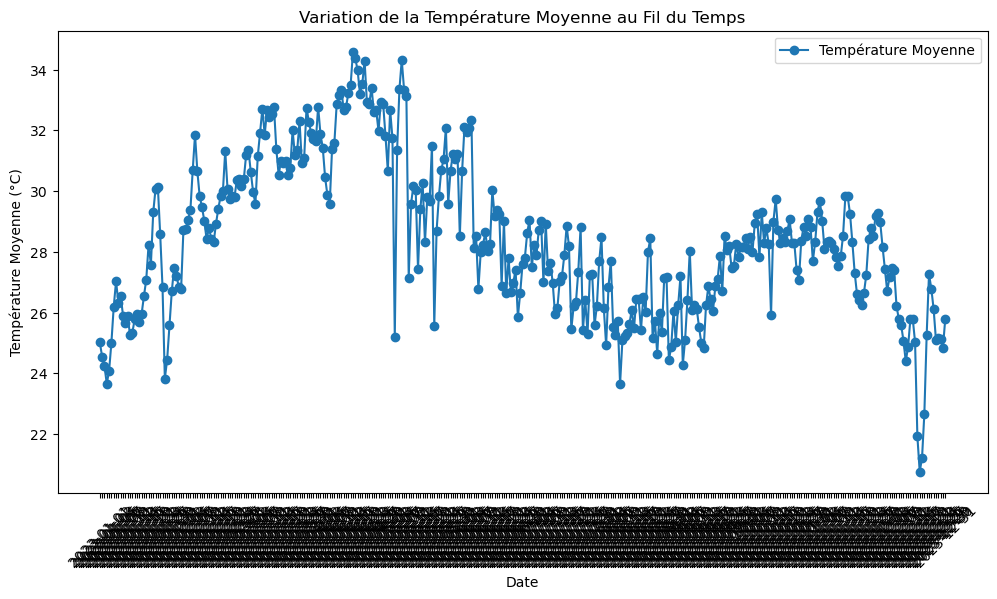

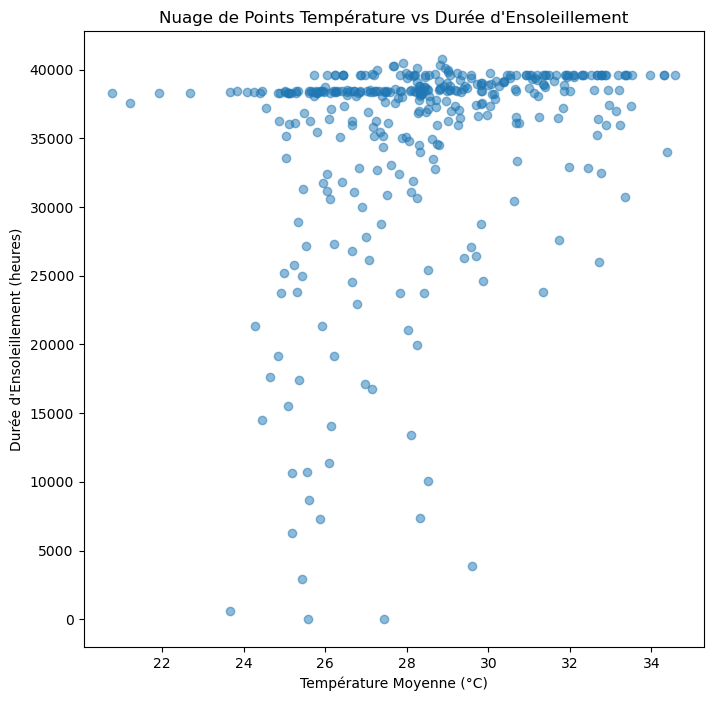

In [9]:

# Chargez vos données météorologiques dans un DataFrame
# df = pd.read_csv('votre_fichier.csv')  # Assurez-vous de spécifier le chemin correct

# Visualisation de la température moyenne au fil du temps
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['temperature_2m_mean'], label='Température Moyenne', marker='o')
plt.xlabel('Date')
plt.ylabel('Température Moyenne (°C)')
plt.title('Variation de la Température Moyenne au Fil du Temps')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Nuage de points entre la température et la durée d'ensoleillement
plt.figure(figsize=(8, 8))
plt.scatter(df['temperature_2m_mean'], df['sunshine_duration'], alpha=0.5)
plt.xlabel('Température Moyenne (°C)')
plt.ylabel('Durée d\'Ensoleillement (heures)')
plt.title('Nuage de Points Température vs Durée d\'Ensoleillement')
plt.show()


In [ ]:

# Nuage de points interactif avec Plotly Express
fig = px.scatter(df, x='temperature_2m_mean', y='sunshine_duration', hover_data=['date'],
                 title='Nuage de Points Interactif : Température vs Durée d\'Ensoleillement')
fig.update_layout(xaxis_title='Température Moyenne (°C)', yaxis_title='Durée d\'Ensoleillement (heures)')
fig.show()


In [11]:
# Assurez-vous que la colonne 'date' est au format datetime
df['date'] = pd.to_datetime(df['date'])

# Nuage de points interactif avec Plotly Express
fig = px.line(df, x='date', y='temperature_2m_mean', title='Température Moyenne au Fil du Temps',
              labels={'temperature_2m_mean': 'Température Moyenne (°C)', 'date': 'Date'})

# Ajoutez une plage de dates pour la sélection
fig.update_xaxes(rangeslider_visible=True)

# Affichez la figure
fig.show()

nuage de point

In [ ]:

fig = px.scatter(df, x='temperature_2m_mean', y='humidity', color='rain_sum',
                 size='wind_speed_10m_max', hover_data=['date'],
                 title='Nuage de Points Interactif : Température vs Humidité',
                 labels={'temperature_2m_mean': 'Température Moyenne (°C)',
                         'humidity': 'Humidité (%)', 'rain_sum': 'Somme des Précipitations (mm)',
                         'wind_speed_10m_max': 'Vitesse Maximale du Vent (m/s)', 'date': 'Date'})
fig.show()


In [17]:
import plotly.express as px

fig = px.scatter(df, x='temperature_2m_mean', y='sunshine_duration', color='rain_sum',
                 size='wind_speed_10m_max', hover_data=['date'],
                 title='Nuage de Points Interactif : Température vs Durée d\'Ensoleillement',
                 labels={'temperature_2m_mean': 'Température Moyenne (°C)',
                         'sunshine_duration': 'Durée d\'Ensoleillement (heures)',
                         'rain_sum': 'Somme des Précipitations (mm)',
                         'wind_speed_10m_max': 'Vitesse Maximale du Vent (m/s)',
                         'date': 'Date'})
fig.show()


In [16]:
print(df.columns)


Index(['date', 'weather_code', 'temperature_2m_mean', 'sunrise', 'sunset',
       'daylight_duration', 'sunshine_duration', 'rain_sum',
       'precipitation_hours', 'wind_speed_10m_max'],
      dtype='object')


Graphique en Barres Interactif :


In [13]:

fig = px.bar(df, x='date', y='rain_sum', title='Somme des Précipitations par Jour',
             labels={'rain_sum': 'Somme des Précipitations (mm)', 'date': 'Date'})
fig.show()


Carte Interactive :

In [22]:

# Assurez-vous que la colonne 'date' est au format datetime
df['date'] = pd.to_datetime(df['date'])

# Créez des colonnes 'lat' et 'lon' avec des valeurs constantes
df['lat'] = 12.65
df['lon'] = -8

fig = px.scatter_geo(df, lon='lon', lat='lat', color='temperature_2m_mean', size='rain_sum',
                     hover_data=['date'], title='Carte Interactive : Température, Précipitations',
                     labels={'temperature_2m_mean': 'Température Moyenne (°C)',
                             'rain_sum': 'Somme des Précipitations (mm)', 'date': 'Date'})
fig.show()


In [35]:
import plotly.express as px
import plotly.graph_objects as go

# Assurez-vous que la colonne 'date' est au format datetime
df['lat'] = 12.65
df['lon'] = -8

# Spécifiez les coordonnées d'un point au Mali (par exemple, Bamako)

# Créez une carte interactive avec Plotly Express
fig = px.scatter_geo(df, lon='lon', lat='lat', color='temperature_2m_mean', size='rain_sum',
                     hover_data=['date'], title='Carte Interactive : Température, Précipitations',
                     labels={'temperature_2m_mean': 'Température Moyenne (°C)',
                             'rain_sum': 'Somme des Précipitations (mm)', 'date': 'Date'},
                     scope='africa')  # Spécifiez le scope pour le continent africain

# Ajoutez un marqueur pour le point spécifié au Mali

# Affichez la carte
fig.show()


In [34]:

# Assurez-vous que la colonne 'date' est au format datetime
df['date'] = pd.to_datetime(df['date'])

# Créez une carte interactive avec Plotly Express
fig = px.scatter_geo(df, lon='lon', lat='lat', color='temperature_2m_mean', size='rain_sum',
                     hover_data=['date'], title='Carte Interactive : Température, Précipitations',
                     labels={'temperature_2m_mean': 'Température Moyenne (°C)',
                             'rain_sum': 'Somme des Précipitations (mm)', 'date': 'Date'},
                     scope='africa')  # Spécifiez le scope pour le continent africain

# Ajoutez un marqueur pour Bamako
bamako_coords = dict(lat=12.6392, lon=-8.0029)
fig.add_trace(go.Scattergeo(lon=[bamako_coords['lon']], lat=[bamako_coords['lat']], text=['Bamako'],
                            marker=dict(color='red', size=10), mode='markers'))

# Affichez la carte
fig.show()

In [36]:
fig = px.bar(df, x='date', y='temperature_2m_mean', title='Température Moyenne au Fil du Temps',
             labels={'temperature_2m_mean': 'Température Moyenne (°C)', 'date': 'Date'})
fig.show()


In [37]:
fig = px.line(df, x='date', y=['temperature_2m_mean', 'rain_sum'],
              title='Variation de la Température et des Précipitations au Fil du Temps',
              labels={'value': 'Valeur', 'variable': 'Variable', 'date': 'Date'})
fig.show()


In [3]:
fig = px.bar(df, x='date', y='rain_sum', title='Somme des Précipitations Quotidienne',
             labels={'rain_sum': 'Somme des Précipitations (mm)', 'date': 'Date'})
fig.show()


In [39]:
fig = px.density_mapbox(df, lat='lat', lon='lon', z='temperature_2m_mean', radius=10,
                         center=dict(lat=12.6392, lon=-8.0029), zoom=5,
                         title='Carte de Chaleur : Température Moyenne',
                         labels={'temperature_2m_mean': 'Température Moyenne (°C)'})
fig.update_layout(mapbox_style="stamen-terrain")
fig.show()


In [40]:
fig = px.box(df, y='temperature_2m_mean', title='Distribution de la Température Moyenne',
             labels={'temperature_2m_mean': 'Température Moyenne (°C)'})
fig.show()


In [41]:
fig = px.violin(df, y='temperature_2m_mean', x='rain_sum',
                title='Distribution de la Température et des Précipitations',
                labels={'temperature_2m_mean': 'Température Moyenne (°C)', 'rain_sum': 'Somme des Précipitations (mm)'})
fig.show()


In [4]:
fig = px.scatter_3d(df, x='temperature_2m_mean', y='rain_sum', z='wind_speed_10m_max',
                    color='temperature_2m_mean', size='rain_sum',
                    labels={'temperature_2m_mean': 'Température Moyenne (°C)',
                            'rain_sum': 'Somme des Précipitations (mm)',
                            'wind_speed_10m_max': 'Vitesse Maximale du Vent (m/s)'})
fig.show()


In [5]:
fig = px.scatter_matrix(df, dimensions=['temperature_2m_mean', 'rain_sum', 'wind_speed_10m_max'],
                        color='temperature_2m_mean', title='Diagramme en Paires : Relations entre les Variables')
fig.show()


/home/mato/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



En résumé, ce script vous permet de visualiser la relation entre la température moyenne et la somme des précipitations, en ajoutant une ligne de tendance linéaire pour estimer la tendance générale des données. La ligne de tendance est tracée en utilisant la méthode des moindres carrés ordinaires, ce qui permet d'illustrer une possible relation linéaire entre ces deux variables météorologiques.

In [6]:
fig = px.scatter(df, x='temperature_2m_mean', y='rain_sum', trendline='ols',
                 labels={'temperature_2m_mean': 'Température Moyenne (°C)',
                         'rain_sum': 'Somme des Précipitations (mm)'})
fig.show()


Index(['date', 'weather_code', 'temperature_2m_mean', 'sunrise', 'sunset',
       'daylight_duration', 'sunshine_duration', 'rain_sum',
       'precipitation_hours', 'wind_speed_10m_max'],
      dtype='object')

In [13]:
df.describe()

,weather_code,temperature_2m_mean,sunrise,sunset,daylight_duration,sunshine_duration,rain_sum,precipitation_hours,wind_speed_10m_max
count,365.000000,365.000000,365.0,365.0,365.000000,365.000000,365.000000,365.000000,365.000000
mean,22.076712,28.394011,0.0,0.0,43672.904142,35098.547588,1.948493,1.605479,14.671392
std,27.295687,2.553033,0.0,0.0,1850.254395,7666.158113,5.075299,3.016980,3.614837
min,0.000000,20.760668,0.0,0.0,40975.340000,0.000000,0.000000,0.000000,6.409617
25%,1.000000,26.431498,0.0,0.0,41870.758000,35242.710000,0.000000,0.000000,12.101570
50%,2.000000,28.264832,0.0,0.0,43685.590000,38363.200000,0.000000,0.000000,14.489720
75%,51.000000,30.044000,0.0,0.0,45476.473000,39053.930000,0.600000,2.000000,16.981165
max,65.000000,34.589840,0.0,0.0,46321.754000,40765.060000,40.899998,17.000000,29.808346


L'index que vous avez fourni semble être la liste des colonnes d'un DataFrame, probablement utilisé pour stocker des données météorologiques. Voici une brève description de chaque colonne :

1. `date`: La date à laquelle les données météorologiques ont été enregistrées.
2. `weather_code`: Un code numérique ou catégoriel représentant le type de conditions météorologiques (soleil, pluie, neige, etc.).
3. `temperature_2m_mean`: La température moyenne à 2 mètres au-dessus du sol.
4. `sunrise`: L'heure du lever du soleil.
5. `sunset`: L'heure du coucher du soleil.
6. `daylight_duration`: La durée de la lumière du jour.
7. `sunshine_duration`: La durée d'ensoleillement.
8. `rain_sum`: La somme des précipitations sur la période enregistrée.
9. `precipitation_hours`: Le nombre d'heures pendant lesquelles des précipitations ont été enregistrées.
10. `wind_speed_10m_max`: La vitesse maximale du vent à 10 mètres au-dessus du sol.

Ces colonnes représentent des mesures et des informations liées aux conditions météorologiques enregistrées à un moment donné. Vous pouvez utiliser ces données pour effectuer diverses analyses et créer des visualisations pour mieux comprendre les tendances météorologiques au fil du temps.

In [16]:
import plotly.express as px

# Divisez les colonnes par 60 pour convertir les minutes en heures
df['daylight_duration_hours'] = df['daylight_duration'] / 3600
df['sunshine_duration_hours'] = df['sunshine_duration'] / 3600

# Créez un graphique en ligne avec Plotly Express
fig = px.line(df, x='date', y=['daylight_duration_hours', 'sunshine_duration_hours'],
              title='Variation de la Durée de la Lumière du Jour et de l\'Ensoleillement au Fil du Temps',
              labels={'value': 'Heures', 'variable': 'Variable', 'date': 'Date'})

# Affichez le graphique
fig.show()


In [5]:
fig = px.line(data, x='date', y='wind_speed_10m_max',
              title='Variation de la Vitesse Maximale du Vent au Fil du Temps',
              labels={'wind_speed_10m_max': 'Vitesse Maximale du Vent (m/s)', 'date': 'Date'})

# Affichez le graphique
fig.show()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8766 entries, 0 to 8765
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       8766 non-null   object 
 1   weather_code               8766 non-null   float64
 2   temperature_2m_mean        8766 non-null   float64
 3   apparent_temperature_mean  8766 non-null   float64
 4   sunrise                    8766 non-null   int64  
 5   sunset                     8766 non-null   int64  
 6   daylight_duration          8766 non-null   float64
 7   sunshine_duration          8766 non-null   float64
 8   rain_sum                   8766 non-null   float64
 9   precipitation_hours        8766 non-null   float64
 10  wind_speed_10m_max         8766 non-null   float64
 11  shortwave_radiation_sum    8766 non-null   float64
dtypes: float64(9), int64(2), object(1)
memory usage: 821.9+ KB
